In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Gagan\University\Sem 5\Discrete Maths\Project\Graph-Theory-for-Portfolio-Optimization\ind_nifty500list.csv")
df

,Company Name,Industry,Symbol,Series,ISIN Code
0,360 ONE WAM Ltd.,Financial Services,360ONE,EQ,INE466L01038
1,3M India Ltd.,Diversified,3MINDIA,EQ,INE470A01017
2,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
3,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
4,AIA Engineering Ltd.,Capital Goods,AIAENG,EQ,INE212H01026
...,...,...,...,...,...
495,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL,EQ,INE256A01028
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH,EQ,INE520A01027
497,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE,EQ,INE010B01027


In [2]:
df['Symbol'] = df['Symbol'] + '.NS'

industry_abbr = {
    'Financial Services': 'FIN',
    'Diversified': 'DIV',
    'Capital Goods': 'CAP',
    'Construction Materials': 'CON',
    'Chemicals': 'CHE',
    'Healthcare': 'HEA',
    'Power': 'POW',
    'Metals & Mining': 'MET',
    'Services': 'SER',
    'Oil Gas & Consumable Fuels': 'OIL',
    'Fast Moving Consumer Goods': 'FMC',
    'Consumer Services': 'CSV',
    'Forest Materials': 'FOR',
    'Information Technology': 'IT',
    'Textiles': 'TEX',
    'Automobile and Auto Components': 'AUT',
    'Consumer Durables': 'CND',
    'Realty': 'REA',
    'Telecommunication': 'TEL',
    'Construction': 'CST',
    'Media Entertainment & Publication': 'MED'
}

df['Industry_Abbr'] = df['Industry'].map(industry_abbr)
df['Industry_Symbol_Abbr'] = df['Industry_Abbr'] + '_' + df['Symbol']
df

,Company Name,Industry,Symbol,Series,ISIN Code,Industry_Abbr,Industry_Symbol_Abbr
0,360 ONE WAM Ltd.,Financial Services,360ONE.NS,EQ,INE466L01038,FIN,FIN_360ONE.NS
1,3M India Ltd.,Diversified,3MINDIA.NS,EQ,INE470A01017,DIV,DIV_3MINDIA.NS
2,ABB India Ltd.,Capital Goods,ABB.NS,EQ,INE117A01022,CAP,CAP_ABB.NS
3,ACC Ltd.,Construction Materials,ACC.NS,EQ,INE012A01025,CON,CON_ACC.NS
4,AIA Engineering Ltd.,Capital Goods,AIAENG.NS,EQ,INE212H01026,CAP,CAP_AIAENG.NS
...,...,...,...,...,...,...,...
495,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL.NS,EQ,INE256A01028,MED,MED_ZEEL.NS
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH.NS,EQ,INE520A01027,IT,IT_ZENSARTECH.NS
497,Zomato Ltd.,Consumer Services,ZOMATO.NS,EQ,INE758T01015,CSV,CSV_ZOMATO.NS
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE.NS,EQ,INE010B01027,HEA,HEA_ZYDUSLIFE.NS


In [3]:
import yfinance as yf

tickers = df['Symbol'].to_list()
data = yf.download(tickers, start = "2019-04-01", end = "2024-03-31")["Close"]
data.index = pd.to_datetime(data.index).strftime('%Y-%m-%d')
data

[*********************100%***********************]  500 of 500 completed

11 Failed downloads:
['AEGISLOG.NS', 'EMCURE.NS', 'UNITDSPR.NS', 'BHARTIHEXA.NS', 'INDGN.NS', 'GODIGIT.NS', 'AADHARHFC.NS', 'TBOTEK.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-04-01 -> 2024-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1554057000, endDate = 1711823400")')
['TV18BRDCST.NS', 'RELIANCE.NS', 'HEG.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-04-01 -> 2024-03-31)')


Ticker,360ONE.NS,3MINDIA.NS,AADHARHFC.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ABREL.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,NaN,24294.750000,NaN,380.601868,1161.000000,1196.376221,7296.850098,103.349998,221.192703,924.299988,...,61.150002,NaN,1505.699951,261.649994,275.899994,431.700012,230.600006,6642.399902,NaN,344.250000
2019-04-02,NaN,24304.000000,NaN,386.166443,1160.099976,1200.552368,7309.200195,103.000000,216.806305,918.750000,...,60.200001,NaN,1503.699951,261.649994,280.299988,417.700012,232.899994,6543.250000,NaN,344.049988
2019-04-03,NaN,23983.500000,NaN,383.833679,1159.599976,1209.403931,7329.000000,100.300003,216.559875,904.799988,...,58.700001,NaN,1490.050049,261.649994,273.700012,404.549988,230.100006,6395.549805,NaN,338.750000
2019-04-04,NaN,23654.900391,NaN,385.437439,1146.300049,1203.321289,7260.399902,98.150002,216.904877,912.599976,...,57.450001,NaN,1487.000000,259.049988,268.049988,417.299988,231.199997,6344.899902,NaN,344.399994
2019-04-05,NaN,23861.650391,NaN,394.902069,1139.750000,1250.620728,7302.200195,99.650002,215.869888,924.950012,...,57.000000,NaN,1459.050049,262.100006,266.850006,411.500000,230.899994,6326.250000,NaN,345.399994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,673.400024,30049.250000,NaN,648.500000,1349.199951,5864.899902,27673.250000,173.449997,206.350006,1457.050049,...,141.350006,744.700012,1254.750000,500.450012,23.400000,140.899994,591.200012,15284.950195,169.649994,993.150024
2024-03-22,665.849976,30728.400391,NaN,655.299988,1356.099976,5967.399902,27067.099609,175.050003,205.350006,1459.300049,...,141.649994,761.099976,1237.449951,487.100006,23.900000,142.449997,590.299988,15359.400391,174.199997,999.750000
2024-03-26,650.299988,30487.150391,NaN,656.500000,1325.150024,5929.799805,26701.050781,177.100006,207.000000,1444.500000,...,140.550003,755.650024,1222.699951,479.850006,23.549999,139.250000,600.349976,14965.099609,182.600006,1017.049988


In [4]:
symbol_abbr = pd.Series(df.Industry_Symbol_Abbr.values, index = df.Symbol).to_dict()
data.rename(columns = symbol_abbr, inplace = True)
sector_sorted_columns = sorted(data.columns, key=lambda x: x.split('_')[0])
data = data[sector_sorted_columns]
data

Ticker,AUT_APOLLOTYRE.NS,AUT_ARE&M.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_CRAFTSMAN.NS,...,TEL_ROUTE.NS,TEL_TATACOMM.NS,TEL_TEJASNET.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,225.850006,NaN,257.000000,2915.649902,990.700012,511.600006,18105.849609,1140.050049,232.600006,NaN,...,NaN,379.090332,171.100006,2.918400,4.950000,113.190002,25531.800781,7.140000,217.610001,61.150002
2019-04-02,221.250000,NaN,255.600006,2853.100098,1003.349976,514.200012,17946.250000,1130.550049,233.149994,NaN,...,NaN,375.551208,169.000000,2.966243,5.150000,115.309998,25192.949219,6.945000,214.979996,60.200001
2019-04-03,219.850006,NaN,253.800003,2847.300049,996.150024,503.799988,18005.949219,1100.550049,229.500000,NaN,...,NaN,371.918945,168.399994,2.918400,5.150000,112.860001,24662.800781,6.835000,214.350006,58.700001
2019-04-04,222.899994,NaN,249.399994,2859.100098,985.549988,507.950012,17832.300781,1111.849976,227.100006,NaN,...,NaN,369.901001,168.250000,2.870557,4.950000,112.540001,24439.599609,6.745000,214.509995,57.450001
2019-04-05,224.050003,NaN,244.899994,2861.649902,986.150024,512.349976,17994.849609,1124.449951,224.550003,NaN,...,NaN,374.744049,169.949997,2.918400,4.800000,114.650002,24012.199219,6.815000,214.139999,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,461.000000,756.150024,520.450012,8750.599609,2309.550049,1102.000000,30066.250000,2528.149902,441.649994,3972.350098,...,1603.449951,1908.199951,692.750000,78.250000,27.049999,801.200012,34092.851562,37.000000,433.049988,141.350006
2024-03-22,468.350006,778.000000,530.799988,8945.250000,2276.050049,1128.949951,30178.699219,2593.000000,445.549988,4149.549805,...,1600.550049,1922.650024,687.000000,78.550003,27.350000,794.000000,34449.851562,38.650002,439.299988,141.649994
2024-03-26,471.450012,774.200012,528.799988,8960.549805,2266.399902,1130.150024,30680.349609,2626.800049,445.100006,4172.049805,...,1600.500000,1947.599976,673.000000,76.650002,26.650000,826.250000,34609.500000,37.400002,441.399994,140.550003


In [5]:
# Function to identify stocks with more than two consecutive NaNs
def remove_stocks_with_consecutive_nans(data, max_consecutive_nans=2):
    # Create a mask to track NaNs (excluding 'Date' column)
    nan_mask = data.iloc[:, 1:].isna()  # Exclude the 'Date' column

    # Initialize a list to keep track of columns to drop
    columns_to_drop = []

    # Loop through each column (stock) to check for consecutive NaNs
    for col in nan_mask.columns:  # Iterate over columns except 'Date'
        # Check for consecutive NaNs in the column
        consecutive_nans = nan_mask[col].astype(int).groupby((~nan_mask[col]).cumsum()).cumsum()

        # If the maximum count of consecutive NaNs is greater than the threshold, mark the column for dropping
        if consecutive_nans.max() > max_consecutive_nans:
            columns_to_drop.append(col)

    # Drop the identified columns from the original DataFrame (preserving the Date column)
    data = data.drop(columns=columns_to_drop)

    return data

# Remove stocks with more than two consecutive NaNs
data = remove_stocks_with_consecutive_nans(data)

data.to_csv("close_price.csv")
data

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_ENDURANCE.NS,...,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TEJASNET.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,225.850006,257.000000,2915.649902,990.700012,511.600006,18105.849609,1140.050049,232.600006,2004.839966,1150.949951,...,100.050003,379.090332,171.100006,2.918400,4.950000,113.190002,25531.800781,7.140000,217.610001,61.150002
2019-04-02,221.250000,255.600006,2853.100098,1003.349976,514.200012,17946.250000,1130.550049,233.149994,2058.350098,1171.800049,...,104.400002,375.551208,169.000000,2.966243,5.150000,115.309998,25192.949219,6.945000,214.979996,60.200001
2019-04-03,219.850006,253.800003,2847.300049,996.150024,503.799988,18005.949219,1100.550049,229.500000,2020.270020,1169.000000,...,100.650002,371.918945,168.399994,2.918400,5.150000,112.860001,24662.800781,6.835000,214.350006,58.700001
2019-04-04,222.899994,249.399994,2859.100098,985.549988,507.950012,17832.300781,1111.849976,227.100006,2048.955078,1171.250000,...,102.750000,369.901001,168.250000,2.870557,4.950000,112.540001,24439.599609,6.745000,214.509995,57.450001
2019-04-05,224.050003,244.899994,2861.649902,986.150024,512.349976,17994.849609,1124.449951,224.550003,2098.030029,1172.599976,...,101.550003,374.744049,169.949997,2.918400,4.800000,114.650002,24012.199219,6.815000,214.139999,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,461.000000,520.450012,8750.599609,2309.550049,1102.000000,30066.250000,2528.149902,441.649994,3918.949951,1779.900024,...,256.100006,1908.199951,692.750000,78.250000,27.049999,801.200012,34092.851562,37.000000,433.049988,141.350006
2024-03-22,468.350006,530.799988,8945.250000,2276.050049,1128.949951,30178.699219,2593.000000,445.549988,3988.399902,1786.400024,...,261.000000,1922.650024,687.000000,78.550003,27.350000,794.000000,34449.851562,38.650002,439.299988,141.649994
2024-03-26,471.450012,528.799988,8960.549805,2266.399902,1130.150024,30680.349609,2626.800049,445.100006,3911.100098,1762.849976,...,252.649994,1947.599976,673.000000,76.650002,26.650000,826.250000,34609.500000,37.400002,441.399994,140.550003


In [7]:
import numpy as np
log_returns = np.log(data / data.shift(1))
log_returns

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_ENDURANCE.NS,...,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TEJASNET.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-02,-0.020578,-0.005462,-0.021687,0.012688,0.005069,-0.008854,-0.008368,0.002362,0.026340,0.017953,...,0.042560,-0.009380,-0.012350,0.016261,0.039609,0.018556,-0.013361,-0.027691,-0.012159,-0.015658
2019-04-03,-0.006348,-0.007067,-0.002035,-0.007202,-0.020433,0.003321,-0.026894,-0.015779,-0.018674,-0.002392,...,-0.036581,-0.009719,-0.003557,-0.016261,0.000000,-0.021476,-0.021268,-0.015966,-0.002935,-0.025233
2019-04-04,0.013778,-0.017489,0.004136,-0.010698,0.008204,-0.009691,0.010215,-0.010513,0.014099,0.001923,...,0.020650,-0.005441,-0.000891,-0.016529,-0.039609,-0.002839,-0.009091,-0.013255,0.000746,-0.021525
2019-04-05,0.005146,-0.018208,0.000891,0.000609,0.008625,0.009074,0.011269,-0.011292,0.023669,0.001152,...,-0.011748,0.013008,0.010053,0.016529,-0.030772,0.018575,-0.017643,0.010325,-0.001726,-0.007864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.019605,0.017933,0.013229,0.012702,0.008475,0.006535,0.022642,0.017588,0.011639,0.015172,...,0.029924,0.010483,0.011761,0.001919,0.016776,0.013825,0.025519,0.017724,0.015241,0.001770
2024-03-22,0.015818,0.019691,0.022000,-0.014611,0.024161,0.003733,0.025328,0.008792,0.017566,0.003645,...,0.018952,0.007544,-0.008335,0.003827,0.011030,-0.009027,0.010417,0.043629,0.014329,0.002120
2024-03-26,0.006597,-0.003775,0.001709,-0.004249,0.001062,0.016486,0.012951,-0.001010,-0.019571,-0.013271,...,-0.032515,0.012893,-0.020589,-0.024486,-0.025927,0.039814,0.004624,-0.032876,0.004769,-0.007796


In [8]:
log_returns = log_returns.dropna(axis=1, how='all')
log_returns = log_returns.drop(log_returns.index[0])
log_returns.to_csv("log_returns.csv")
log_returns

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_ENDURANCE.NS,...,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TEJASNET.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-02,-0.020578,-0.005462,-0.021687,0.012688,0.005069,-0.008854,-0.008368,0.002362,0.026340,0.017953,...,0.042560,-0.009380,-0.012350,0.016261,0.039609,0.018556,-0.013361,-0.027691,-0.012159,-0.015658
2019-04-03,-0.006348,-0.007067,-0.002035,-0.007202,-0.020433,0.003321,-0.026894,-0.015779,-0.018674,-0.002392,...,-0.036581,-0.009719,-0.003557,-0.016261,0.000000,-0.021476,-0.021268,-0.015966,-0.002935,-0.025233
2019-04-04,0.013778,-0.017489,0.004136,-0.010698,0.008204,-0.009691,0.010215,-0.010513,0.014099,0.001923,...,0.020650,-0.005441,-0.000891,-0.016529,-0.039609,-0.002839,-0.009091,-0.013255,0.000746,-0.021525
2019-04-05,0.005146,-0.018208,0.000891,0.000609,0.008625,0.009074,0.011269,-0.011292,0.023669,0.001152,...,-0.011748,0.013008,0.010053,0.016529,-0.030772,0.018575,-0.017643,0.010325,-0.001726,-0.007864
2019-04-08,-0.017787,-0.017714,-0.002905,-0.007890,-0.017623,0.000006,-0.017313,-0.011196,-0.017679,-0.000810,...,-0.038650,-0.018562,0.028710,0.000000,-0.042560,-0.007090,-0.001507,-0.012551,0.013083,0.017392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.019605,0.017933,0.013229,0.012702,0.008475,0.006535,0.022642,0.017588,0.011639,0.015172,...,0.029924,0.010483,0.011761,0.001919,0.016776,0.013825,0.025519,0.017724,0.015241,0.001770
2024-03-22,0.015818,0.019691,0.022000,-0.014611,0.024161,0.003733,0.025328,0.008792,0.017566,0.003645,...,0.018952,0.007544,-0.008335,0.003827,0.011030,-0.009027,0.010417,0.043629,0.014329,0.002120
2024-03-26,0.006597,-0.003775,0.001709,-0.004249,0.001062,0.016486,0.012951,-0.001010,-0.019571,-0.013271,...,-0.032515,0.012893,-0.020589,-0.024486,-0.025927,0.039814,0.004624,-0.032876,0.004769,-0.007796


In [9]:
correlation_matrix = log_returns.corr()
correlation_matrix

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_ENDURANCE.NS,...,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TEJASNET.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Ticker,,,,,,,,,,,,,,,,,,,,,
AUT_APOLLOTYRE.NS,1.000000,0.298305,0.390956,0.496322,0.475217,0.460845,0.453074,0.305170,0.421948,0.264747,...,0.280786,0.236550,0.230087,0.185721,0.102315,0.301465,0.331322,0.287034,0.225308,0.351151
AUT_ASAHIINDIA.NS,0.298305,1.000000,0.255996,0.260382,0.282910,0.291483,0.225540,0.256593,0.267985,0.187248,...,0.209734,0.173767,0.230474,0.152001,0.116726,0.215087,0.219648,0.238311,0.229612,0.245164
AUT_BAJAJ-AUTO.NS,0.390956,0.255996,1.000000,0.318882,0.402640,0.398641,0.271267,0.253890,0.459877,0.233957,...,0.196045,0.162944,0.152485,0.138730,0.084747,0.193198,0.319092,0.177411,0.141677,0.237063
AUT_BALKRISIND.NS,0.496322,0.260382,0.318882,1.000000,0.370880,0.412283,0.316287,0.255035,0.437063,0.243763,...,0.222449,0.178769,0.186714,0.081219,0.119969,0.280691,0.316136,0.225185,0.171087,0.278676
AUT_BHARATFORG.NS,0.475217,0.282910,0.402640,0.370880,1.000000,0.472313,0.287881,0.265358,0.420544,0.228653,...,0.265382,0.230881,0.231975,0.184656,0.096506,0.300278,0.326664,0.221808,0.222626,0.310827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEX_KPRMILL.NS,0.301465,0.215087,0.193198,0.280691,0.300278,0.283127,0.172391,0.209966,0.262736,0.155337,...,0.190933,0.153994,0.200298,0.128679,0.082185,1.000000,0.184511,0.234323,0.262719,0.226601
TEX_PAGEIND.NS,0.331322,0.219648,0.319092,0.316136,0.326664,0.333519,0.209770,0.251120,0.374245,0.218283,...,0.142766,0.160320,0.110595,0.088363,0.061995,0.184511,1.000000,0.158341,0.170991,0.225139
TEX_TRIDENT.NS,0.287034,0.238311,0.177411,0.225185,0.221808,0.283919,0.248732,0.194009,0.193287,0.161652,...,0.232758,0.175362,0.218328,0.185496,0.131704,0.234323,0.158341,1.000000,0.245009,0.272387


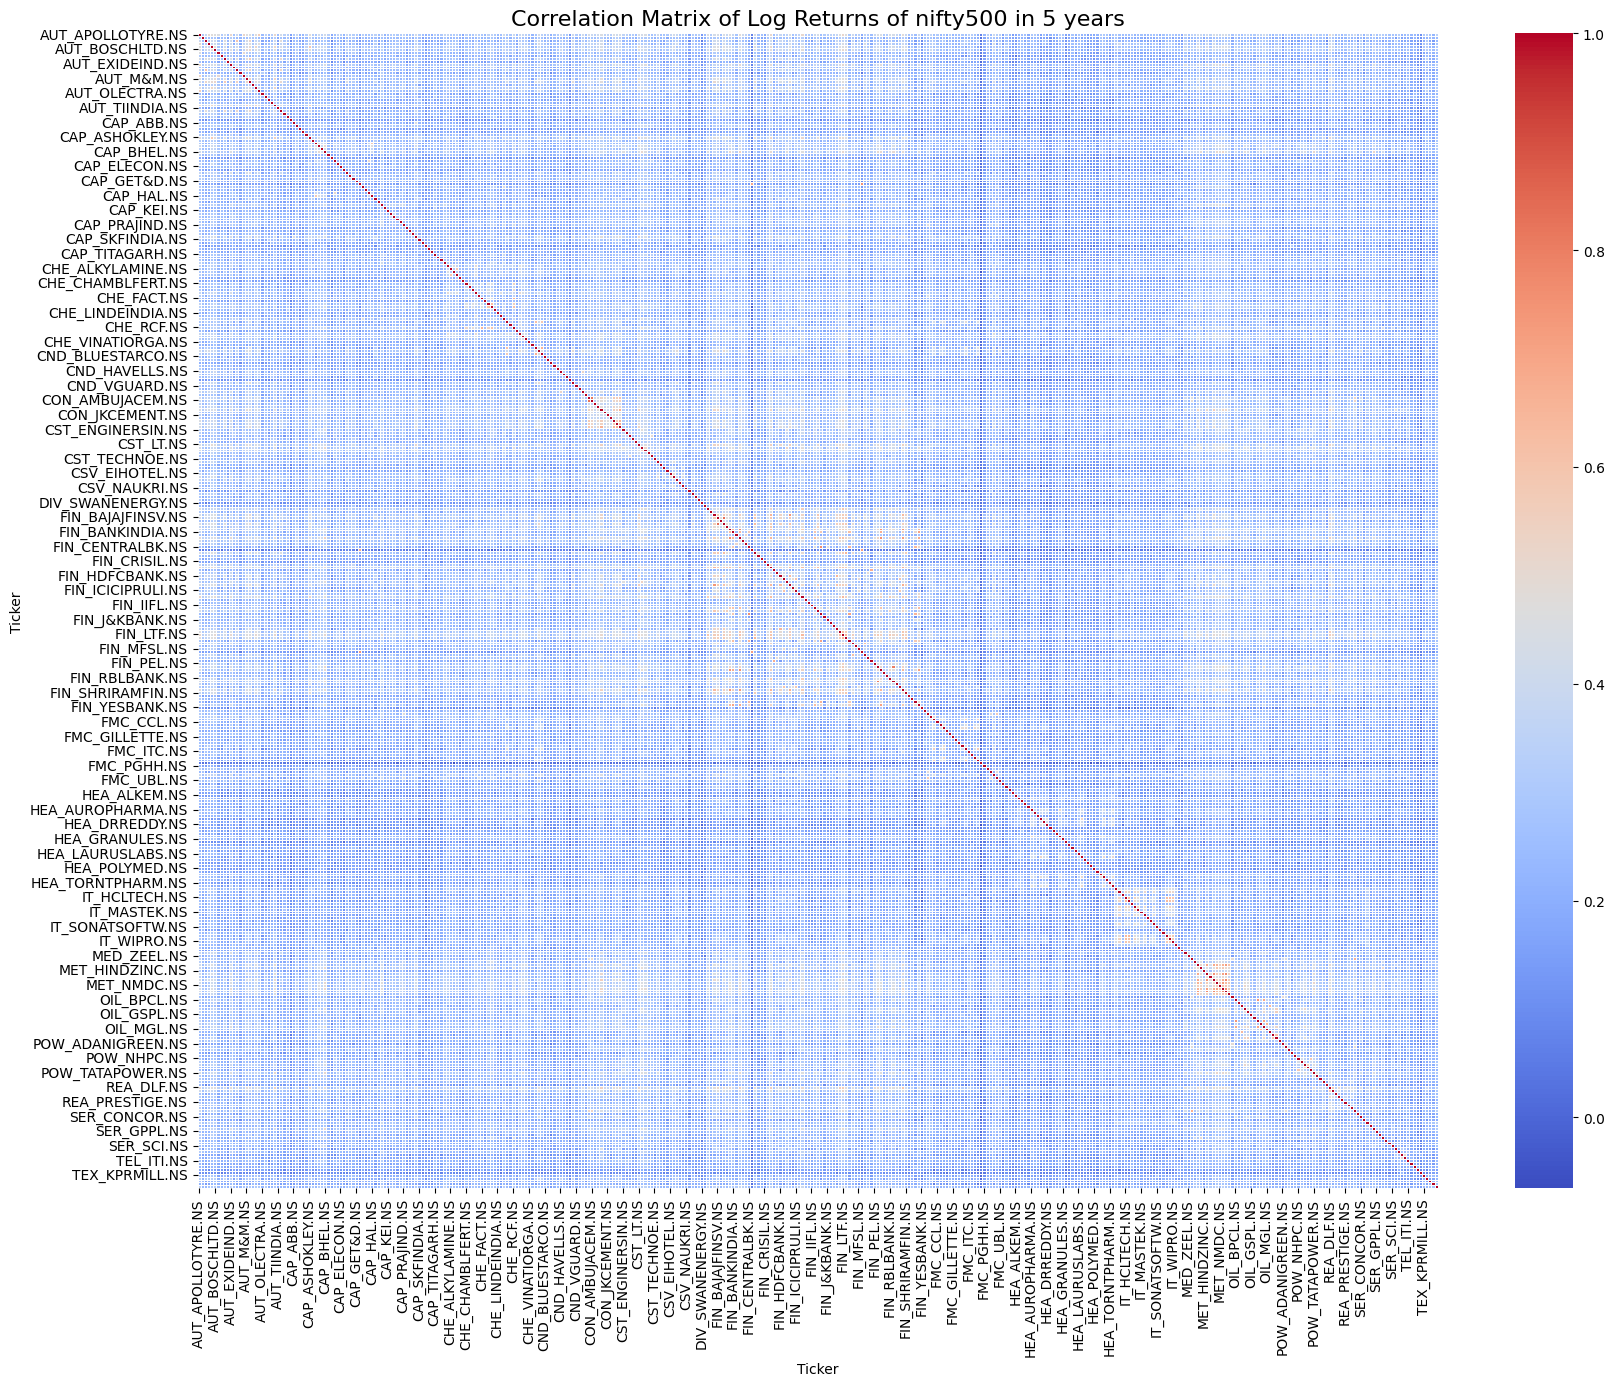

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Log Returns of nifty500 in 5 years", fontsize=16)
plt.savefig('Correlation Matrix of Log Returns of nifty500 in 5 years.png')
plt.show()

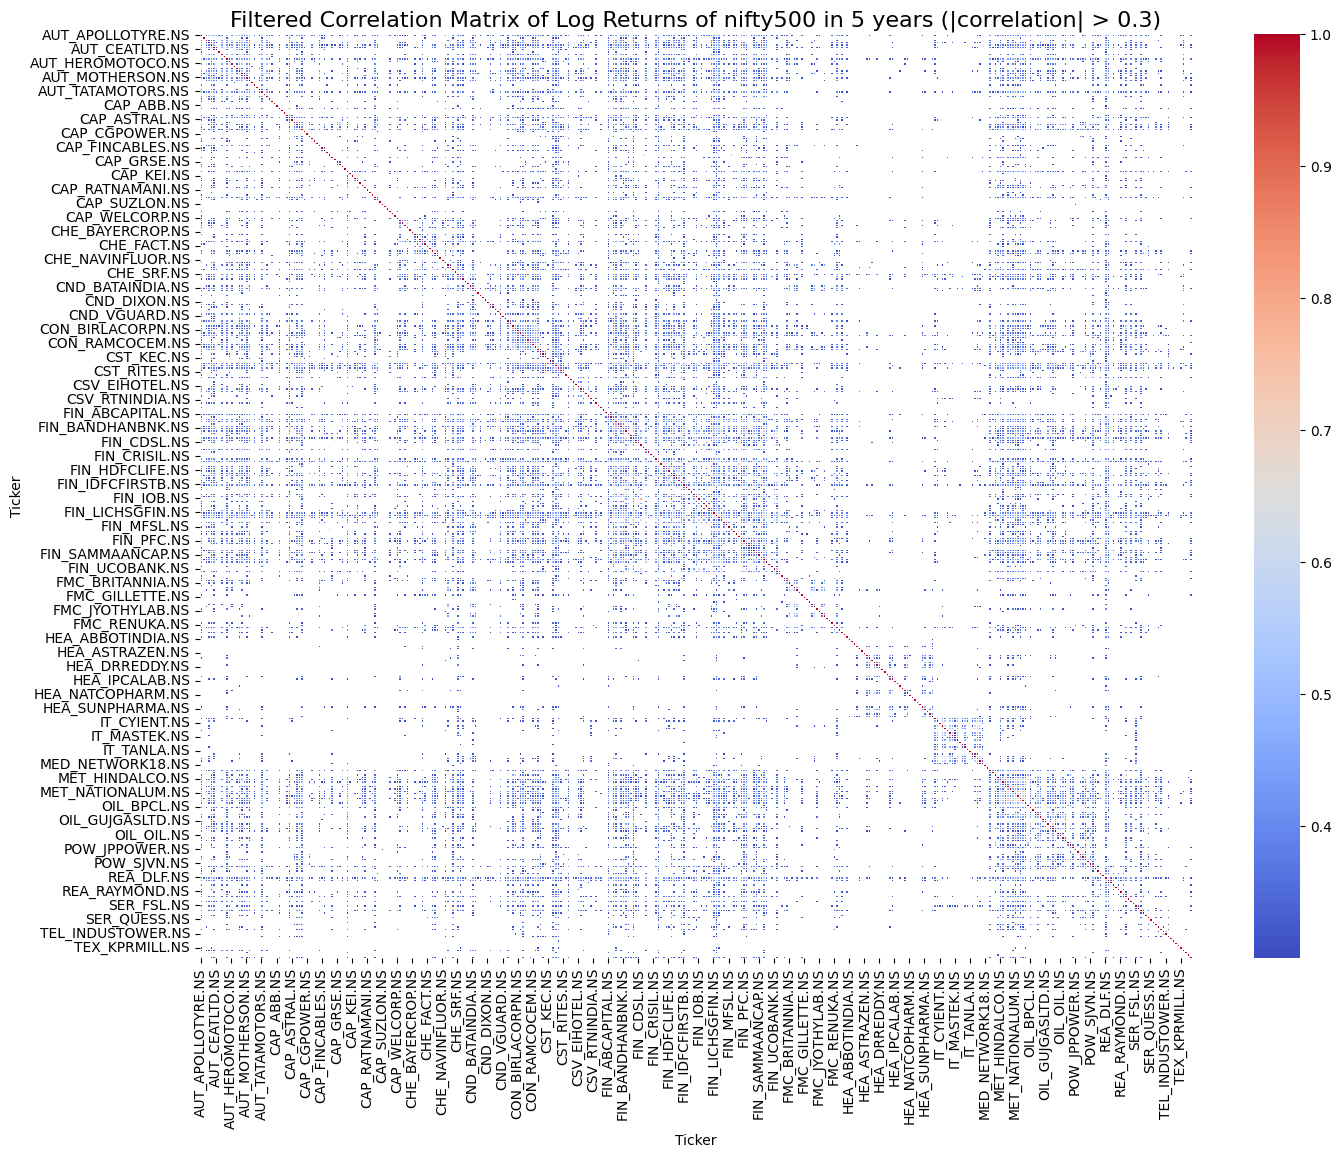

In [11]:
# Only display correlations with absolute values above 0.3
filtered_correlation = correlation_matrix[(correlation_matrix >= 0.3) | (correlation_matrix <= -0.3)]

plt.figure(figsize=(16,12))
sns.heatmap(filtered_correlation, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Filtered Correlation Matrix of Log Returns of nifty500 in 5 years (|correlation| > 0.3)", fontsize=16)
plt.savefig('Filtered Correlation Matrix of Log Returns of nifty500 in 5 years.png')
plt.show()


In [37]:
import numpy as np
import pandas as pd
import networkx as nx
import community as community_louvain

# Function to create clusters based on correlation threshold
def get_clusters(correlation_matrix, threshold):
    G = nx.Graph()
    
    # Add nodes
    for ticker in correlation_matrix.columns:
        G.add_node(ticker)

    # Add edges based on threshold
    for i, stock1 in enumerate(correlation_matrix.columns):
        for j, stock2 in enumerate(correlation_matrix.columns):
            if i < j:
                corr_value = correlation_matrix.loc[stock1, stock2]
                if abs(corr_value) < threshold:
                    G.add_edge(stock1, stock2, weight=corr_value)

    # Apply Louvain method
    partition = community_louvain.best_partition(G, weight='weight')
    
    # Organize nodes into clusters
    clusters = {}
    for node, cluster_id in partition.items():
        if cluster_id not in clusters:
            clusters[cluster_id] = []
        clusters[cluster_id].append(node)
    
    return clusters

# Define a range of thresholds to test
thresholds = np.arange(0.1, 0.6, 0.1)  # Example thresholds from 0.1 to 0.5
all_clusters = {}

# Iterate through each threshold and collect clusters
for threshold in thresholds:
    clusters = get_clusters(correlation_matrix, threshold)
    all_clusters[threshold] = clusters

# Display the clusters for each threshold
for threshold, clusters in all_clusters.items():
    print(f"Threshold: {threshold}")
    for cluster_id, stocks in clusters.items():
        print(f"  Cluster {cluster_id}: {stocks}")

Threshold: 0.1
  Cluster 0: ['AUT_APOLLOTYRE.NS', 'AUT_BOSCHLTD.NS', 'AUT_CEATLTD.NS', 'AUT_EXIDEIND.NS', 'AUT_JKTYRE.NS', 'AUT_M&M.NS', 'AUT_MOTHERSON.NS', 'AUT_TATAMOTORS.NS', 'CAP_ASHOKLEY.NS', 'CAP_ASTRAL.NS', 'CAP_BEL.NS', 'CAP_BEML.NS', 'CAP_BHEL.NS', 'CAP_ESCORTS.NS', 'CAP_FINCABLES.NS', 'CAP_FINPIPE.NS', 'CAP_INOXWIND.NS', 'CAP_JINDALSAW.NS', 'CAP_KIRLOSBROS.NS', 'CAP_MAHSEAMLES.NS', 'CAP_PRAJIND.NS', 'CAP_SIEMENS.NS', 'CAP_TITAGARH.NS', 'CAP_WELCORP.NS', 'CHE_AARTIIND.NS', 'CHE_BALAMINES.NS', 'CHE_CHAMBLFERT.NS', 'CHE_DEEPAKFERT.NS', 'CHE_DEEPAKNTR.NS', 'CHE_GNFC.NS', 'CHE_PCBL.NS', 'CHE_RCF.NS', 'CND_DIXON.NS', 'CND_KAJARIACER.NS', 'CND_TITAN.NS', 'CND_VOLTAS.NS', 'CON_ACC.NS', 'CON_AMBUJACEM.NS', 'CON_DALBHARAT.NS', 'CON_GRASIM.NS', 'CON_INDIACEM.NS', 'CON_JKCEMENT.NS', 'CON_RAMCOCEM.NS', 'CON_ULTRACEMCO.NS', 'CST_KNRCON.NS', 'CST_LT.NS', 'CST_NBCC.NS', 'CST_PNCINFRA.NS', 'CST_RITES.NS', 'CST_TECHNOE.NS', 'CSV_ABFRL.NS', 'CSV_EIHOTEL.NS', 'FIN_ABCAPITAL.NS', 'FIN_BAJAJFINSV.

In [38]:
def girvan_newman_clustering(G):
    # Use the Girvan-Newman algorithm to find communities
    comp = nx.algorithms.community.girvan_newman(G)
    # Get the first partition of the graph
    return next(comp)

# Example of using the Girvan-Newman algorithm
G = nx.Graph()
# Add nodes and edges as before based on a correlation threshold
for i, stock1 in enumerate(correlation_matrix.columns):
    for j, stock2 in enumerate(correlation_matrix.columns):
        if i < j:
            corr_value = correlation_matrix.loc[stock1, stock2]
            if abs(corr_value) < 0.3:  # Use an appropriate threshold
                G.add_edge(stock1, stock2)

# Get clusters using Girvan-Newman
gn_clusters = girvan_newman_clustering(G)

# Display clusters from Girvan-Newman
for i, cluster in enumerate(gn_clusters):
    print(f"Girvan-Newman Cluster {i}: {list(cluster)}")

Girvan-Newman Cluster 0: ['FIN_IOB.NS', 'TEL_TTML.NS', 'OIL_GUJGASLTD.NS', 'SER_FSL.NS', 'FIN_KOTAKBANK.NS', 'TEL_ITI.NS', 'TEX_ALOKINDS.NS', 'CST_KNRCON.NS', 'CST_IRB.NS', 'CON_DALBHARAT.NS', 'OIL_BPCL.NS', 'CHE_TATACHEM.NS', 'POW_NTPC.NS', 'FIN_SBILIFE.NS', 'CHE_FINEORG.NS', 'CON_SHREECEM.NS', 'CND_HAVELLS.NS', 'CAP_CARBORUNIV.NS', 'FMC_COLPAL.NS', 'CAP_ASHOKLEY.NS', 'REA_MAHLIFE.NS', 'CAP_WELCORP.NS', 'IT_MASTEK.NS', 'OIL_MRPL.NS', 'CHE_COROMANDEL.NS', 'CHE_GNFC.NS', 'AUT_EXIDEIND.NS', 'AUT_MINDACORP.NS', 'FMC_NESTLEIND.NS', 'IT_INTELLECT.NS', 'HEA_PFIZER.NS', 'OIL_OIL.NS', 'FIN_JMFINANCIL.NS', 'FIN_BAJFINANCE.NS', 'HEA_ASTRAZEN.NS', 'HEA_BIOCON.NS', 'AUT_APOLLOTYRE.NS', 'CAP_CGPOWER.NS', 'FMC_TATACONSUM.NS', 'CAP_BEL.NS', 'FIN_IDBI.NS', 'FIN_SUNDARMFIN.NS', 'FIN_AXISBANK.NS', 'HEA_DIVISLAB.NS', 'HEA_JBCHEPHARM.NS', 'CAP_TIMKEN.NS', 'IT_ZENSARTECH.NS', 'HEA_LALPATHLAB.NS', 'REA_RAYMOND.NS', 'HEA_POLYMED.NS', 'CAP_ELECON.NS', 'AUT_TVSMOTOR.NS', 'FIN_CHOLAFIN.NS', 'CAP_THERMAX.NS', 'S

In [39]:
# Collect results for sensitivity analysis
sensitivity_results = {}

for threshold in thresholds:
    clusters = get_clusters(correlation_matrix, threshold)
    sensitivity_results[threshold] = {
        'num_clusters': len(clusters),
        'clusters': clusters
    }

# Display the results
sensitivity_df = pd.DataFrame({
    'Threshold': [thresh for thresh in sensitivity_results.keys()],
    'Number of Clusters': [result['num_clusters'] for result in sensitivity_results.values()],
})

print(sensitivity_df)

   Threshold  Number of Clusters
0        0.1                   8
1        0.2                   3
2        0.3                   3
3        0.4                   3
4        0.5                   3


In [12]:
import networkx as nx

# Set a correlation threshold
threshold = 0.3

# Initialize an empty graph
G = nx.Graph()

# Add nodes to the graph (each stock ticker)
for ticker in correlation_matrix.columns:
    G.add_node(ticker)

# Add edges based on the threshold, with correlation as the weight
for i, stock1 in enumerate(correlation_matrix.columns):
    for j, stock2 in enumerate(correlation_matrix.columns):
        # Only consider each pair once and avoid self-loops
        if i < j:
            corr_value = correlation_matrix.loc[stock1, stock2]
            # Only add edge if correlation is below the threshold
            if abs(corr_value) < threshold:
                G.add_edge(stock1, stock2, weight=corr_value)

# Now G is a graph with nodes as stocks and edges for low-correlation pairs
# Print some info about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 395
Number of edges: 64709


In [13]:
import community as community_louvain  # The python-louvain package

# Apply Louvain method on the graph
partition = community_louvain.best_partition(G, weight='weight')

# Organize nodes into clusters
clusters = {}
for node, cluster_id in partition.items():
    if cluster_id not in clusters:
        clusters[cluster_id] = []
    clusters[cluster_id].append(node)

# Display the clusters
print(f"Number of clusters found: {len(clusters)}")
for cluster_id, stocks in clusters.items():
    print(f"Cluster {cluster_id}: {stocks}")

Number of clusters found: 4
Cluster 3: ['AUT_APOLLOTYRE.NS', 'AUT_EXIDEIND.NS', 'AUT_M&M.NS', 'AUT_MARUTI.NS', 'AUT_MOTHERSON.NS', 'AUT_TATAMOTORS.NS', 'CAP_AIAENG.NS', 'CAP_ASHOKLEY.NS', 'CAP_PRAJIND.NS', 'CAP_RATNAMANI.NS', 'CHE_BASF.NS', 'CHE_BAYERCROP.NS', 'CHE_DEEPAKNTR.NS', 'CHE_FINEORG.NS', 'CHE_NAVINFLUOR.NS', 'CND_VOLTAS.NS', 'CON_ACC.NS', 'CON_RAMCOCEM.NS', 'CST_LT.NS', 'FIN_ABCAPITAL.NS', 'FIN_AXISBANK.NS', 'FIN_CANBK.NS', 'FIN_CRISIL.NS', 'FIN_CUB.NS', 'FIN_FEDERALBNK.NS', 'FIN_IDFCFIRSTB.NS', 'FIN_LICHSGFIN.NS', 'FIN_LTF.NS', 'FIN_M&MFIN.NS', 'FIN_MOTILALOFS.NS', 'FIN_SBIN.NS', 'FMC_COLPAL.NS', 'FMC_EMAMILTD.NS', 'FMC_GILLETTE.NS', 'FMC_GODREJCP.NS', 'FMC_HINDUNILVR.NS', 'FMC_MARICO.NS', 'FMC_NESTLEIND.NS', 'FMC_PGHH.NS', 'HEA_ABBOTINDIA.NS', 'HEA_AJANTPHARM.NS', 'HEA_ALKEM.NS', 'HEA_APLLTD.NS', 'HEA_APOLLOHOSP.NS', 'HEA_ASTERDM.NS', 'HEA_ASTRAZEN.NS', 'HEA_AUROPHARMA.NS', 'HEA_BIOCON.NS', 'HEA_CAPLIPOINT.NS', 'HEA_CIPLA.NS', 'HEA_DIVISLAB.NS', 'HEA_DRREDDY.NS', 'HEA_ERIS.

In [ ]:
# Analyzing Cluster Properties

# Create a DataFrame to analyze cluster properties
cluster_analysis = pd.DataFrame({
    'Stock': log_returns.columns,
    'Cluster': [partition[stock] for stock in log_returns.columns]
})

# Add sector information for each stock
cluster_analysis['Sector'] = cluster_analysis['Stock'].apply(lambda x: x.split('_')[0])

# Display the cluster distribution
cluster_distribution = cluster_analysis['Cluster'].value_counts().sort_index()
print("Cluster Distribution:")
print(cluster_distribution)

Cluster Distribution:
Cluster
0     94
1     97
2    118
3     86
Name: count, dtype: int64


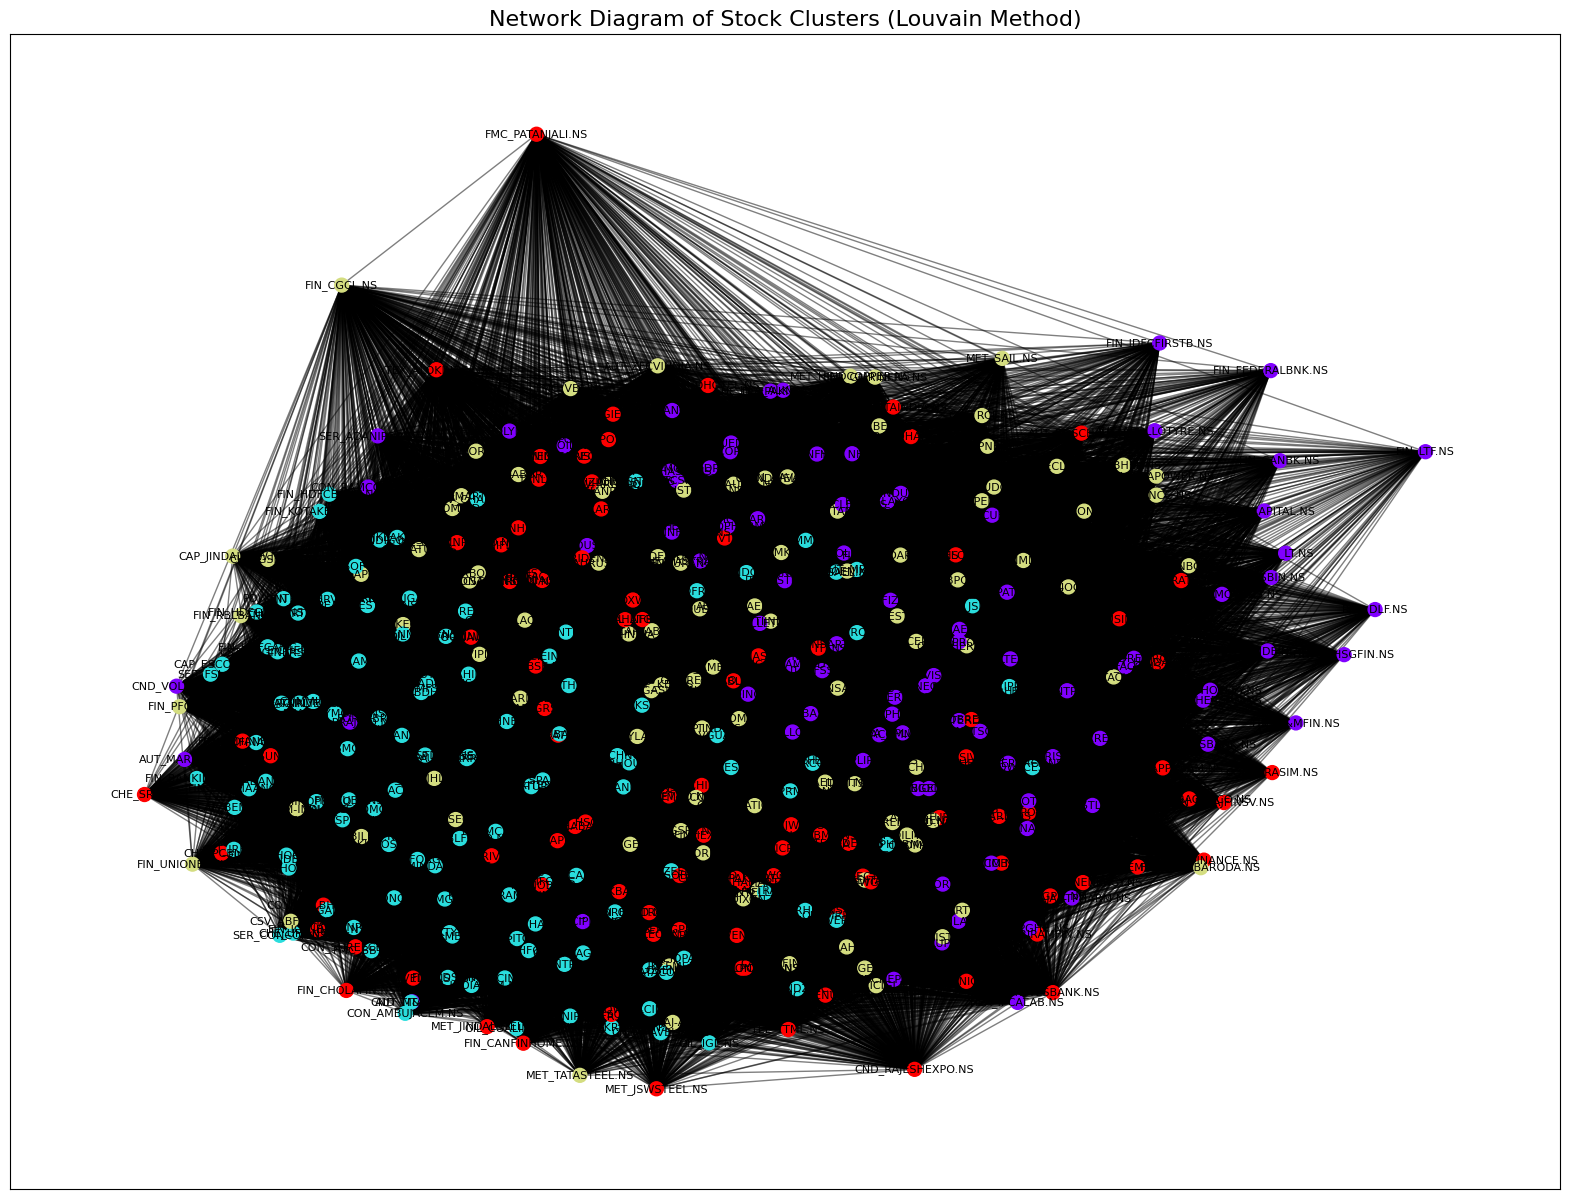

In [ ]:
# Visualizing Clusters of Stocks Identified by Louvain Algorithm

# Assign cluster colors
color_map = []
cluster_colors = {cluster_id: i for i, cluster_id in enumerate(clusters.keys())}
for node in G.nodes():
    color_map.append(cluster_colors[partition[node]])

# Plot the graph with the clusters
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, seed=42)  # Generate the layout for visualization

# Draw nodes with cluster colors
nx.draw_networkx_nodes(G, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=100)

# Draw edges with weights below the threshold
edges = [(u, v) for u, v, d in G.edges(data=True) if abs(d['weight']) < threshold]
nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.5)

# Add labels for each node
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Network Diagram of Stock Clusters (Louvain Method)", fontsize=16)
plt.show()

In [21]:
# Calculate the average log returns and volatility for each cluster
cluster_returns = {}
cluster_volatility = {}

for cluster_id, stocks in clusters.items():
    cluster_data = log_returns[stocks]
    cluster_returns[cluster_id] = cluster_data.mean().mean()  # Mean return of the cluster
    cluster_volatility[cluster_id] = cluster_data.std().mean()  # Average volatility of the cluster

# Create a DataFrame to summarize cluster statistics
cluster_summary = pd.DataFrame({
    'Cluster': list(clusters.keys()),
    'Average Return': [cluster_returns[cl] for cl in clusters.keys()],
    'Average Volatility': [cluster_volatility[cl] for cl in clusters.keys()],
    'Number of Stocks': [len(clusters[cl]) for cl in clusters.keys()]
})

cluster_summary.sort_values(by='Average Return', ascending=False, inplace=True)
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster  Average Return  Average Volatility  Number of Stocks
3        0        0.001033            0.031186                94
1        2        0.000802            0.025885               118
2        1        0.000786            0.023586                97
0        3        0.000661            0.022009                86


In [22]:
# Selecting Clusters for Portfolio Construction

# Display top clusters by average return
selected_clusters = cluster_summary.head(3)  # Select top 3 clusters with highest average return
print("Selected Clusters for Portfolio Construction:")
print(selected_clusters)

Selected Clusters for Portfolio Construction:
   Cluster  Average Return  Average Volatility  Number of Stocks
3        0        0.001033            0.031186                94
1        2        0.000802            0.025885               118
2        1        0.000786            0.023586                97


C:\Users\gagan\AppData\Local\Temp\ipykernel_3300\3791728488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')


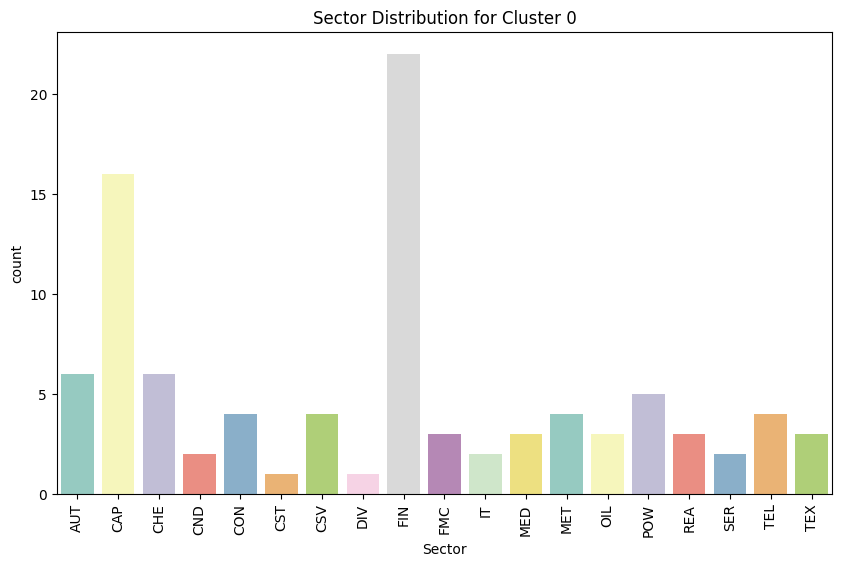

C:\Users\gagan\AppData\Local\Temp\ipykernel_3300\3791728488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')


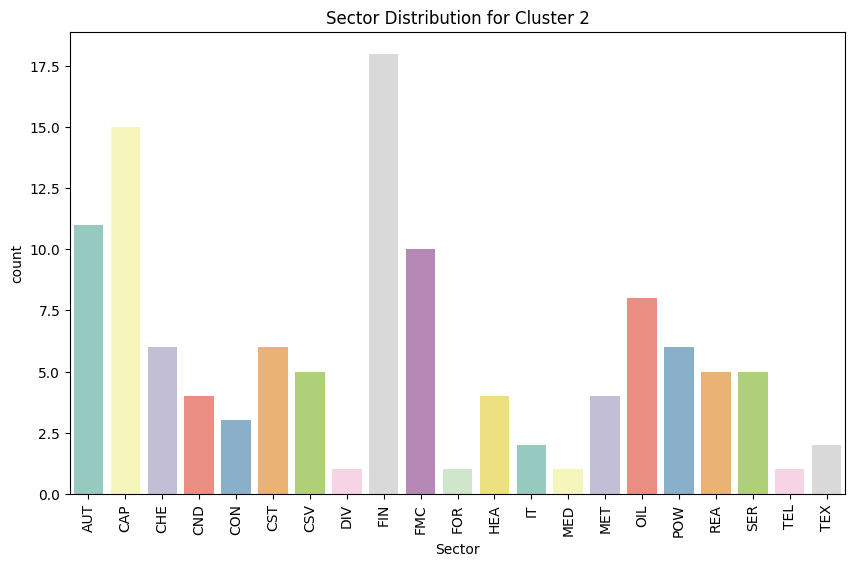

C:\Users\gagan\AppData\Local\Temp\ipykernel_3300\3791728488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')


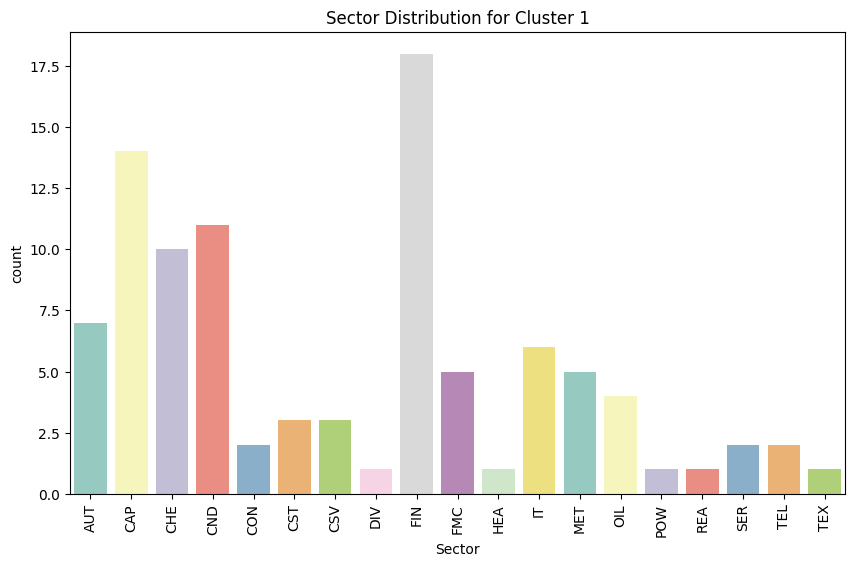

In [23]:
# Visualizing Sector Distribution in Selected Clusters

import seaborn as sns

for cluster_id in selected_clusters['Cluster']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')
    plt.title(f"Sector Distribution for Cluster {cluster_id}")
    plt.xticks(rotation=90)
    plt.show()

## Portfolio Construction and Backtesting of Selected Clusters

In [32]:
# Load the log returns data
log_returns = pd.read_csv("log_returns.csv", index_col=0, parse_dates=True)

# Define the selected clusters for portfolio construction
selected_clusters = [0, 1, 2]  # Replace with actual cluster IDs from previous analysis

# Get stocks for each selected cluster
selected_stocks = [stock for cluster_id in selected_clusters for stock in clusters[cluster_id]]
selected_log_returns = log_returns[selected_stocks]

# Equal weight allocation for simplicity
weights = np.ones(len(selected_stocks)) / len(selected_stocks)

# Calculate the portfolio's daily returns
portfolio_returns = selected_log_returns.dot(weights)

# Cumulative portfolio returns
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()

# Load benchmark data (Nifty 500 index - #CRSLDX)
benchmark = yf.download("^CRSLDX", start="2019-04-01", end="2024-03-31")["Close"].pct_change().dropna()
cumulative_benchmark_returns = (1 + benchmark).cumprod()

[*********************100%***********************]  1 of 1 completed


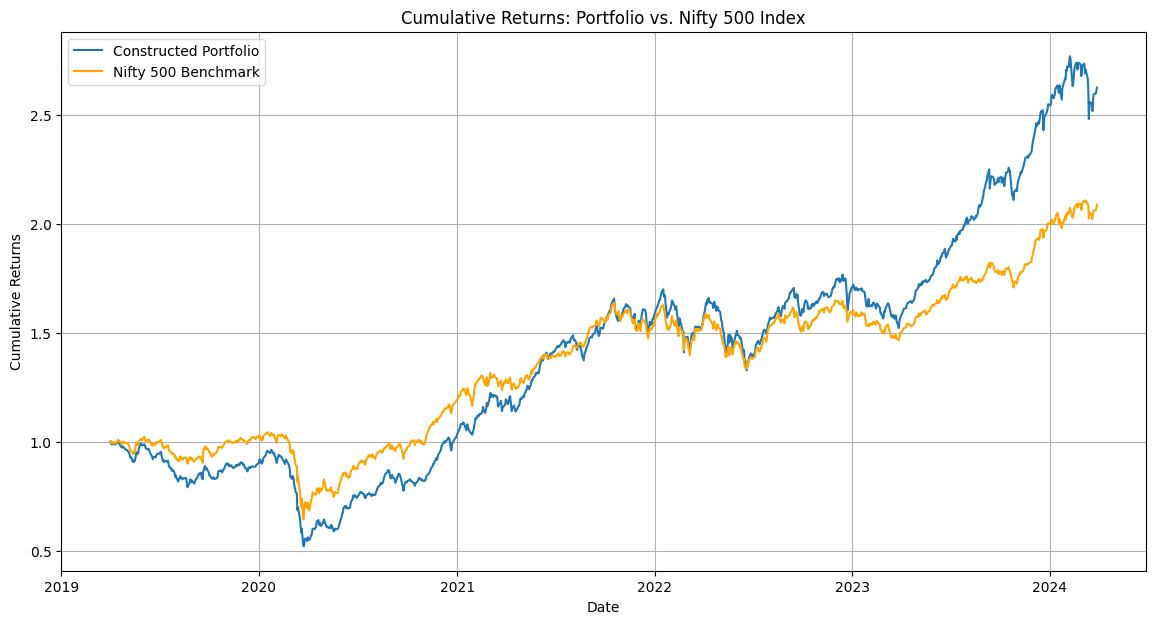

In [33]:
# Plotting cumulative returns for the portfolio and the benchmark
plt.figure(figsize=(14, 7))
plt.plot(cumulative_portfolio_returns, label="Constructed Portfolio")
plt.plot(cumulative_benchmark_returns, label="Nifty 500 Benchmark", color='orange')
plt.title("Cumulative Returns: Portfolio vs. Nifty 500 Index")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Calculate annualized return and volatility for the portfolio
annualized_return = portfolio_returns.mean() * 252
annualized_volatility = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

print("Portfolio Performance Metrics:")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Calculate benchmark performance metrics
benchmark_annualized_return = benchmark.mean() * 252
benchmark_annualized_volatility = benchmark.std() * np.sqrt(252)
benchmark_sharpe_ratio = benchmark_annualized_return / benchmark_annualized_volatility

print("\nBenchmark Performance Metrics:")
print(f"Annualized Return: {benchmark_annualized_return:.2%}")
print(f"Annualized Volatility: {benchmark_annualized_volatility:.2%}")
print(f"Sharpe Ratio: {benchmark_sharpe_ratio:.2f}")

Portfolio Performance Metrics:
Annualized Return: 21.85%
Annualized Volatility: 20.50%
Sharpe Ratio: 1.07

Benchmark Performance Metrics:
Annualized Return: 16.85%
Annualized Volatility: 18.55%
Sharpe Ratio: 0.91


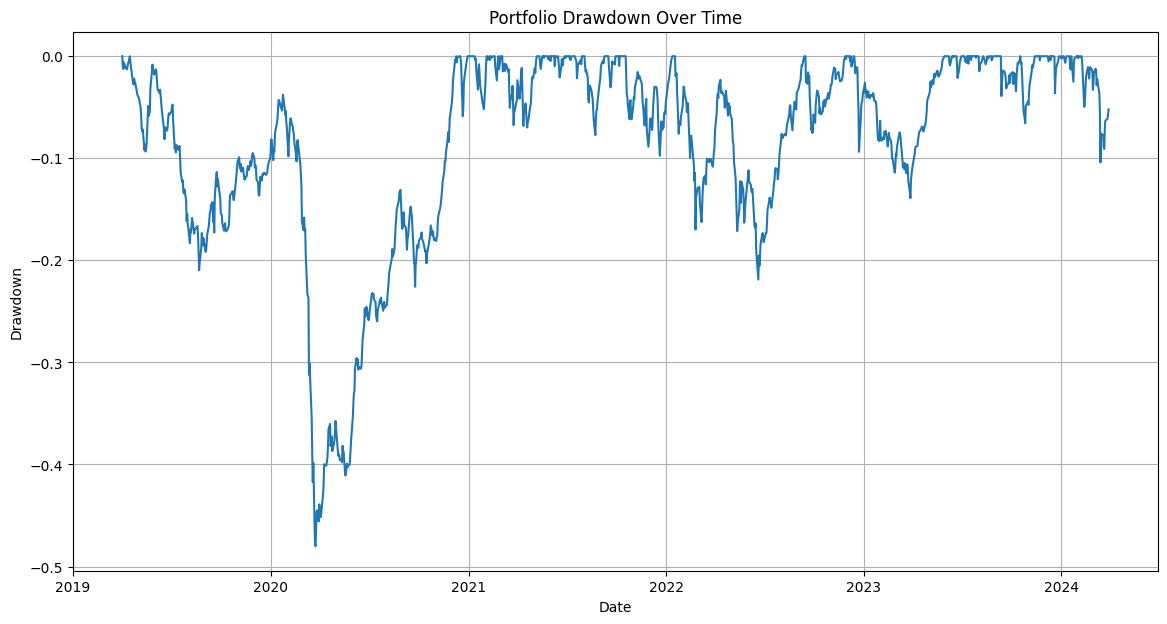

In [35]:
# Visualize the drawdowns of the portfolio
cumulative_max_portfolio = cumulative_portfolio_returns.cummax()
drawdown = (cumulative_portfolio_returns - cumulative_max_portfolio) / cumulative_max_portfolio

plt.figure(figsize=(14, 7))
plt.plot(drawdown, label="Portfolio Drawdown")
plt.title("Portfolio Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.grid(True)
plt.show()

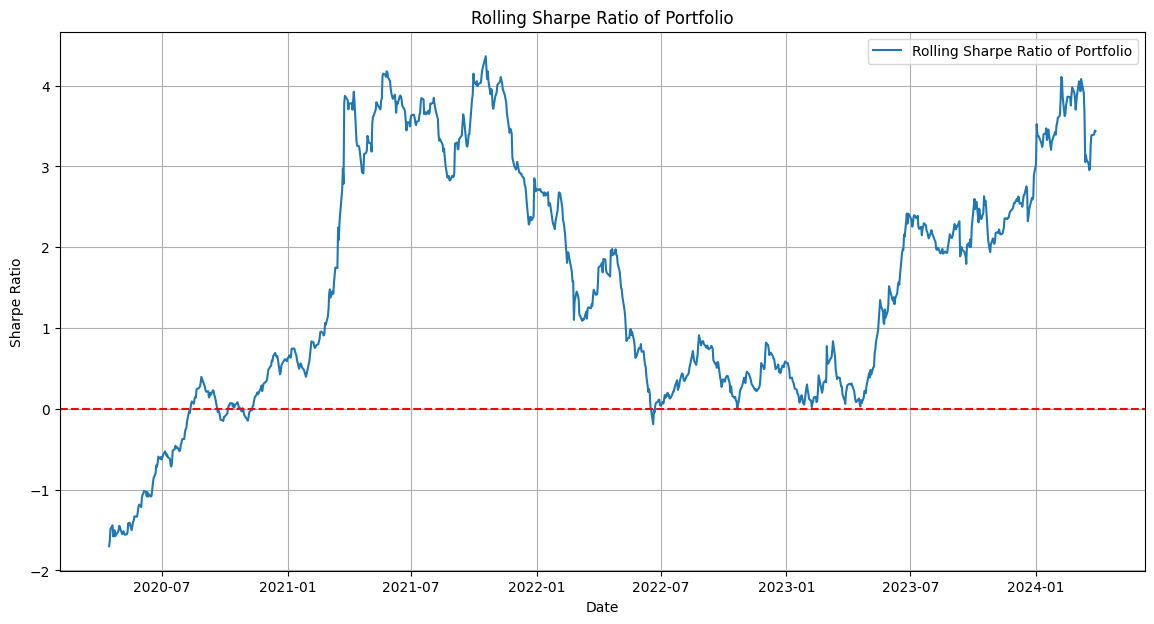

In [36]:
rolling_window = 252  # One year
rolling_sharpe_ratio = portfolio_returns.rolling(rolling_window).mean() / portfolio_returns.rolling(rolling_window).std() * np.sqrt(252)

plt.figure(figsize=(14, 7))
plt.plot(rolling_sharpe_ratio, label="Rolling Sharpe Ratio of Portfolio")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Rolling Sharpe Ratio of Portfolio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid(True)
plt.show()